In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy.fftpack import fft, fftfreq
import scipy as sp
from scatseisnet import ScatteringNetwork

#import betterplot

from scipy import signal
import umap

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import butter, sosfiltfilt


/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [1]:

def filter(x, freqmin = 1, freqmax = 10, fs = 40, order = 4):
    
    zeropole = signal.butter(order, (freqmin, freqmax), 'bp', fs=fs)

    fd = signal.filtfilt(zeropole[0], zeropole[1], x)
    
    return fd




In [3]:
freqmin = 1
freqmax = 8
sr = 40

reduce_type = np.mean

name_fig = 'figure01'

name = f"final_version/{name_fig}"

savepath = f"/bettik/dokhtdor/projects/mirko_volcano_simulations/figures/{name}/"

os.makedirs(savepath, exist_ok=True)


In [5]:


FILEPATH = "/bettik/dokhtdor/projects/mirko_volcano_simulations/dataset/"

vs_hr = np.load(FILEPATH+'vs_map_2400x1300.npy')
vs_hr = vs_hr/1000

vs = np.load(FILEPATH+'vs_array.npy') 
vs = vs/1000

data_records_vs = []
for i in range(1, 6):
    data_read = np.hstack([np.load(FILEPATH+f"vert{i}/z_r_s{i}.npy")[:, np.newaxis,:], np.load(FILEPATH+f"horiz{i}/z_r_s{i}_hor.npy")[:, np.newaxis,:]] )    
    data_records_vs.append(data_read)
data_records_vs = np.array(data_records_vs) 

sos = butter(10, freqmax, 'lp', fs=40, output='sos')
data_records_vs = sosfiltfilt(sos, data_records_vs[:,:,:], axis=-1)
data_records_vs = np.concatenate(data_records_vs, axis = 1)
data_records_vs = data_records_vs[:, :, ::2]

data_records_hs = []
for i in range(1, 6):    
    data_read = np.hstack([np.load(FILEPATH+f"vert{i}/x_r_s{i}.npy")[:, np.newaxis,:], np.load(FILEPATH+f"horiz{i}/x_r_s{i}_hor.npy")[:, np.newaxis,:]] )    
    data_records_hs.append(data_read)
data_records_hs = np.array(data_records_hs)


sos = butter(10, freqmax, 'lp', fs=40, output='sos')
data_records_hs = sosfiltfilt(sos, data_records_hs[:,:,:], axis=-1)
data_records_hs = np.concatenate(data_records_hs, axis = 1)
data_records_hs = data_records_hs[:, :, ::2]


NameError: name 'butter' is not defined

In [27]:
#import ky


[0.7071154496833272,
 0.7071136675538217,
 0.7071108161479244,
 0.7071081052711959,
 0.7071067877049185,
 0.7071076975499923,
 0.7071108172965322,
 0.7071150508033068,
 0.7071185734266422,
 0.7071197566831503]

In [29]:

indx = [15, 35, 55, 75, 95]


In [6]:
sr = 20

from scatseisnet import ScatteringNetwork

segment_duration_seconds = data.shape[-1]/sr

sampling_rate_hertz = sr

samples_per_segment = int(segment_duration_seconds * sampling_rate_hertz)

bank_keyword_arguments = (
        {"octaves": 3, "resolution": 5, "quality": 2, "normalize_wavelet": 'l2'},
        {"octaves": 4, "resolution": 2, "quality": 3, "normalize_wavelet": 'l2'},
        )
         

network = ScatteringNetwork(
    *bank_keyword_arguments,
    bins=samples_per_segment,
    sampling_rate=sampling_rate_hertz,
    )

print(network)

# for i, bank in enumerate(network.banks):
#     print(f"Bank {i}")
#     print(bank)
#     for j in range(bank.wavelets.shape[0]):
#         network.banks[i].wavelets[j] = network.banks[i].wavelets[j] / ((np.abs(network.banks[i].wavelets[j])**2).sum())

# network.banks[0].spectra = np.fft.fft(network.banks[0].wavelets)
# network.banks[1].spectra = np.fft.fft(network.banks[1].wavelets)



NameError: name 'data' is not defined

In [31]:

np.max((network.banks[0].wavelets[0].real))


0.2649777320106275

/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


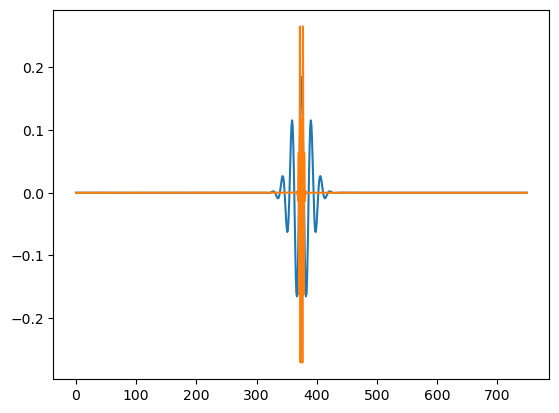

In [32]:
plt.plot(network.banks[0].wavelets[-1])

plt.plot(network.banks[0].wavelets[0])#/np.max(abs(network.banks[0].wavelets[0])))
#plt.xlim(700, 800)


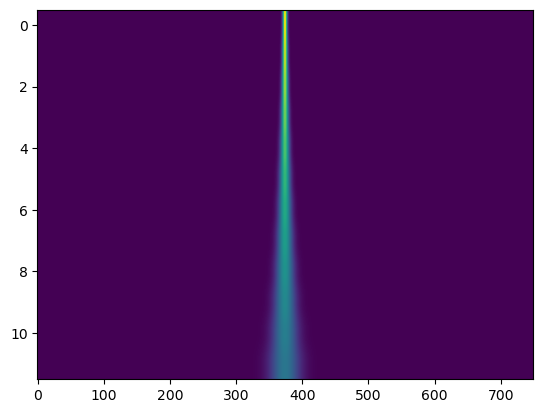

In [33]:
plt.imshow(abs(network.banks[0].wavelets), aspect='auto')

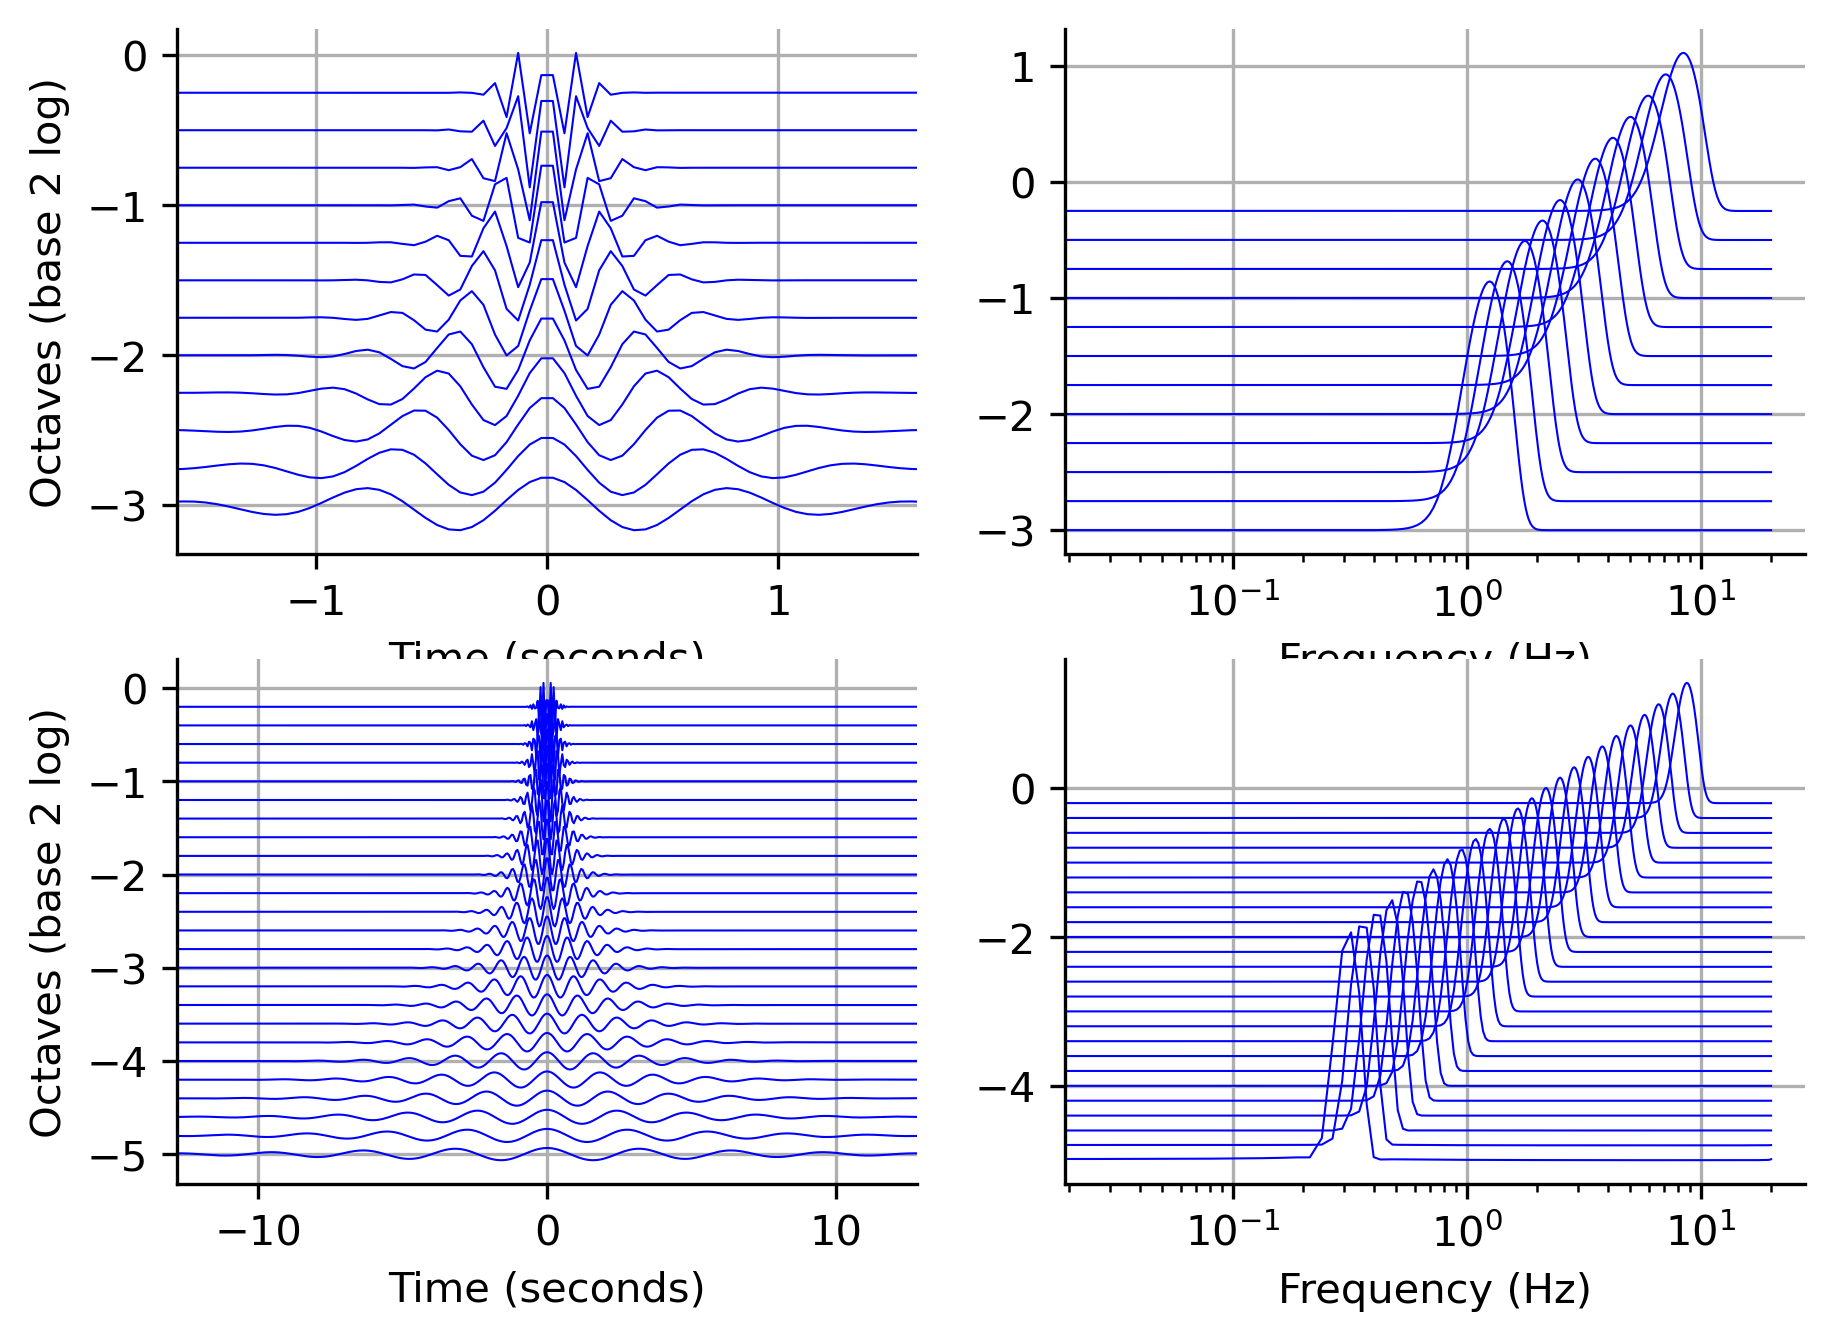

In [34]:

# Loop over network layers
#plt.figure(figsize=(10,5))

#cc = low_pass_filter(2000, sigma = 0.2)
fig, ax = plt.subplots(2, 2, figsize=(7,5),  dpi =300)


for i, bank in enumerate(network.banks):

    # Create axes (left for temporal, right for spectral domain)
    
    ii = 0
    # Show each wavelet
    for wavelet, spectrum, ratio in zip(
        bank.wavelets[:], bank.spectra[:], bank.ratios[:]
    ):

        # Time domain
        ax[i,0].plot(bank.times, wavelet.real + ratio, c= 'b', lw = 0.5)
        #ax[i,0].plot(bank.times, wavelet.imag + ratio, c='r', lw = 0.5)

        # Spectral domain (log of amplitude)
        ax[i,1].plot(bank.frequencies, np.log(np.abs(spectrum) + 1) + ratio, c = 'b', lw = 0.5)
        #ax[i,2].plot(bank.frequencies, np.log(np.abs(spectrum*cc[1000:]) + 1) + ratio, c = 'b', lw = 0.5)
        
    #ax[0,1].plot(bank.frequencies, np.log(np.abs(cc[1000:]) + 1) -0.25, c = 'r', lw = 0.5)

    # Limit view to three times the temporal width of largest wavelet
    width_max = 2 * bank.widths.max()

    # Labels
    
    
    ax[i,0].set_ylabel("Octaves (base 2 log)")
    ax[i,0].set_xlabel("Time (seconds)")
    ax[i,0].set_xlim(-width_max, width_max)
    ax[i,0].grid()
    ax[i,1].set_xscale("log")
    ax[i,1].set_xlabel("Frequency (Hz)")
    ax[i,1].grid()

    #ax[i, 0].set_xlim(0.1, 50)
    #  
    #ax[i,2].set_xscale("log")
    #ax[i,2].set_xlabel("Frequency (Hz)")
    #ax[i,2].grid()
    #ax[i, 1].set_xlim(0.1, 50)
    
    ii = ii+1

for axn in ax.flat:
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)


In [35]:
time = np.arange(0, data.shape[-1], 1) / sr

indxvs = np.arange(120*65).reshape(120, 65)

indx = [15, 35, 55, 75, 95]


In [36]:
segments = [data[i,:,:] for i in indxvs[indx, 30]]


sc1 = network.transform(segments,  reduce_type= None )


sc1med = network.transform(segments,  reduce_type= np.median )

sc1mean = network.transform(segments,  reduce_type= np.mean )
sc1max = network.transform(segments,  reduce_type= np.max )


for i in range(len(network.banks[0].centers)):

    n = network.banks[0].centers[i] <= network.banks[1].centers  # Find the center of the wavelet in the second layer that is closest to the center of the wavelet in the first layer
    sc1mean[1][:,:, i, n] = np.nan
    sc1med[1][:,:, i, n] = np.nan
    sc1max[1][:,:, i, n] = np.nan

    

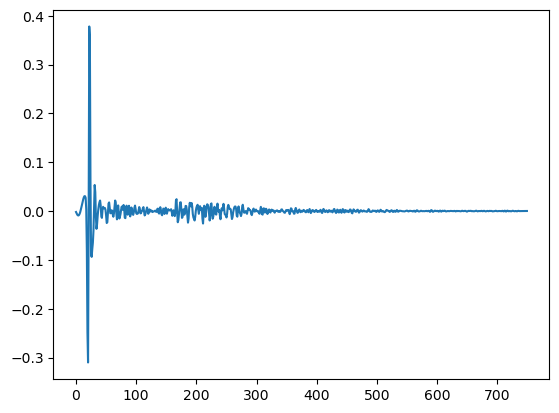

In [37]:
plt.plot(segments[0][0,:])

In [38]:

network.banks[0].centers.shape

(12,)

(0.0, 8.0)

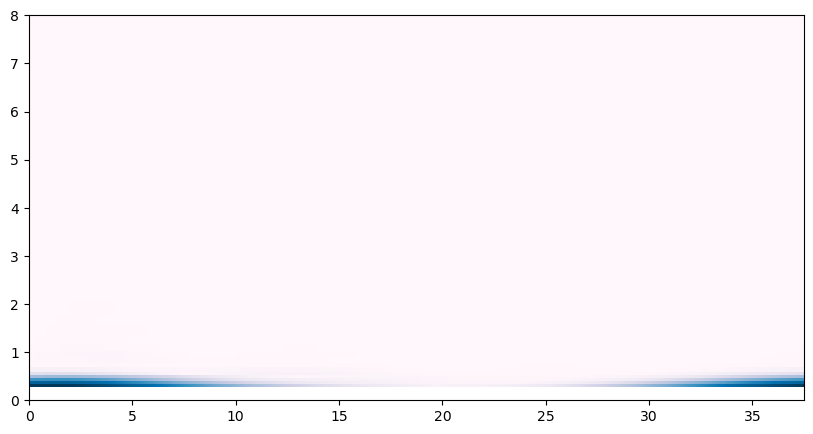

In [39]:
plt.figure(figsize = (10, 5))

#plt.imshow(sc1[1][-1, 0, 4], aspect ='auto')

plt.pcolor(time, network.banks[1].centers, sc1[1][0, 0, 10],  cmap="PuBu", rasterized=True, )

plt.ylim(0, 8)

In [40]:


trc = [0 , -1]



In [41]:
import seaborn as sns

cmap2 = sns.color_palette("hls", 3)

print(cmap2.as_hex())

cmap2


['#db5f57', '#57db5f', '#5f57db']


[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

(0.0, 400.0)

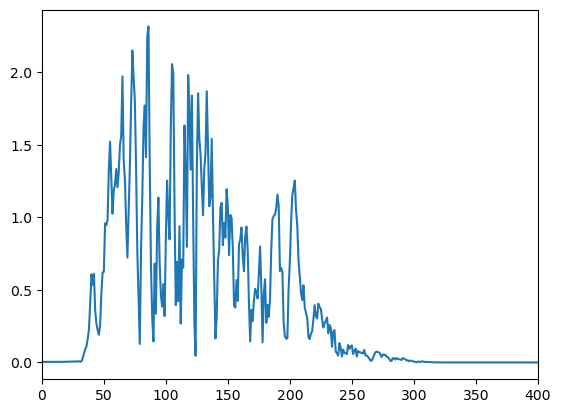

In [42]:

plt.plot(abs(np.fft.fft(segments[-1][0])))
plt.plot()
plt.xlim(0, 400)

In [44]:



from  matplotlib import ticker
mticker = ticker.ScalarFormatter(useOffset=False)


In [45]:

np.linalg.norm(sc1mean[0][ind][0])**0.5

0.1961783471177262

In [46]:
import seaborn as sns

colors = sns.color_palette(n_colors=3)


cmap2 = sns.color_palette("rocket", as_cmap=True)
cmap3 = sns.color_palette("mako", as_cmap=True)


3.2893358163243676
3.328362693645239
0.4090208657791588
0.38847668489590453


/tmp/ipykernel_3119339/2996582042.py:93: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[i].set_ylim(0,10)
/tmp/ipykernel_3119339/2996582042.py:105: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, cax=axins1, orientation="horizontal")
/tmp/ipykernel_3119339/2996582042.py:135: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[i].set_ylim(0,10)
/tmp/ipykernel_3119339/2996582042.py:147: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, cax=axins1, orientation="horizontal")
/tmp/ipykernel_3119339/2996582042.py:160: UserWarning: This figure includes Axes that are

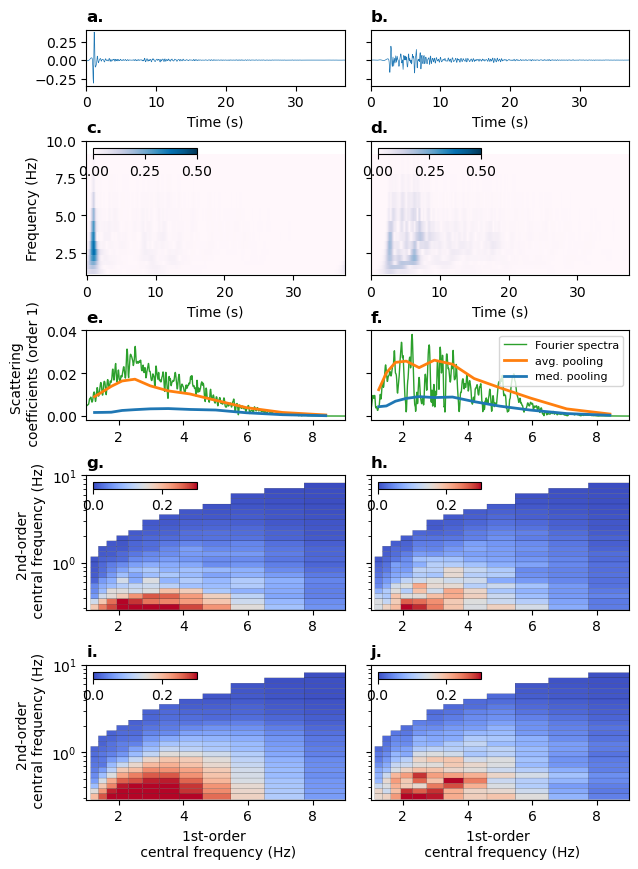

In [50]:

gs = {"hspace": 0.5, "wspace": 0.1, "height_ratios": [1.25,3, 2, 3, 3]}
fig, axs = plt.subplots(
        5, 2, figsize=(7, 10), sharex="row", sharey="row", gridspec_kw=gs
    )

vmax_thr = 0.3
ax = axs[0].reshape(-1)

ifig_caption = ['a.', 'b.', 'c.']
for i, ind in enumerate(trc):

    ax[i].plot(time, segments[ind][0], lw = 0.5, c = colors[0])
    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim(0, 37)

    ax[i].set_title(ifig_caption[i], loc = 'left', fontweight = 'bold') 



ax = axs[1].reshape(-1)
ifig_caption = ['c.', 'd.', 'e.', 'f.']
for i, ind in enumerate(trc):

    im1 = ax[i].pcolor(time, network.banks[0].centers, (sc1[0][ind, 0])**1, vmin =0, vmax = 0.5,  cmap="PuBu", rasterized=True, )
    #ax[i].set_xlabel('1st order \n frequency (Hz)')
    ax[i].set_ylim(1, 10)
    
    print(np.linalg.norm(sc1[0][ind , 0]))

    ax[i].set_xlabel('Time (s)')
    axins1 = inset_axes(
        ax[i],
        width="40%",  # width: 50% of parent_bbox width
        height="5%",  # height: 5%
        loc="upper left",
    )
    axins1.xaxis.set_ticks_position("bottom")
    fig.colorbar(im1, cax=axins1, orientation="horizontal", )

    ax[i].set_title(ifig_caption[i], loc = 'left', fontweight = 'bold') 


ax[0].set_ylabel("Frequency (Hz)")

    

ax = axs[2].reshape(-1)

ifig_caption = ['e.', 'f.', 'h.', 'i.']
for i, ind in enumerate(trc):

    norm = sp.linalg.norm(abs(sp.fft.fft(segments[ind][0], n = 2048))[:]*2)

    l1,  = ax[i].plot(np.fft.fftfreq(2048, 1/sr)[:1024], abs(sp.fft.fft(segments[ind][0], n = 2048))[:1024]/norm, label = 'Fourier spectra', c = colors[2], lw = 1., alpha = 1)
    # axtwin = ax[i].twinx()
    # if i ==0: axtwin.set_yticklabels([])

     
    l2,  = ax[i].plot(network.banks[0].centers, (sc1mean[0][ind][0])*1, lw =2, label = 'avg. pooling', c = colors[1])
    l3,  = ax[i].plot(network.banks[0].centers, (sc1med[0][ind][0])*1, lw = 2, label = 'med. pooling', c = colors[0])
    
    ax[i].set_xlim(1, 9)
    ax[i].set_title(ifig_caption[i], loc = 'left', fontweight = 'bold') 


ax[i].legend(handles=[l1, l2, l3], loc = 'upper right', fontsize = 8)
ax[0].set_ylabel("Scattering \n coefficients (order 1)")
# axtwin.set_ylabel('Amplitude')



ax = axs[3].reshape(-1)
ifig_caption = ['g.', 'h.', 'l.']  
for i, ind in enumerate(trc):

    nn = ((sc1med[1][ind, 0]**0.5).T)
    nn = nn #*(1.2)**(i+1)#- np.median(np.log(sc1med[1]**1), axis = 0)[0].T
    print(np.nanmax(nn)*1.2)

    im1 = ax[i].pcolor(network.banks[0].centers, network.banks[1].centers, nn,
                 cmap = 'coolwarm', vmin =0, vmax = vmax_thr, 
                rasterized=True, edgecolors='k',
                 linewidths=0.1
                 )
    
    #ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    #ax[i].grid(True)

    #ax[i].set_xlabel('1st order \n central frequency (Hz)')

    ax[i].set_xlim(1, 9)
    ax[i].set_ylim(0,10)

    axins1 = inset_axes(
        ax[i],
        width="40%",  # width: 50% of parent_bbox width
        height="5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation=0)

    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(im1, cax=axins1, orientation="horizontal")
    
    ax[i].set_title(ifig_caption[i], loc = 'left', fontweight = 'bold') 
    #ax[i].tick_params(axis="x", which="both", rotation=35)

    ax[i].yaxis.set_minor_formatter(ticker.NullFormatter())
    ax[i].xaxis.set_minor_formatter(mticker)


ax[0].set_ylabel("2nd-order \n central frequency (Hz)")

ax = axs[4].reshape(-1)
ifig_caption = ['i.', 'j.', 'l.']  
for i, ind in enumerate(trc):
    nn = ((sc1mean[1][ind, 0]**0.5).T)
    nn = nn #- np.median(np.log(sc1mean[1]**1), axis = 0)[0].T
    im1 = ax[i].pcolor(network.banks[0].centers, network.banks[1].centers, nn, 
                        vmin =0, vmax= vmax_thr,
                        cmap = 'coolwarm', rasterized=True, 
                        edgecolors='k', linewidths=0.1
                        )


    #ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    #ax[i].grid(True)

    ax[i].set_xlabel('1st-order \n central frequency (Hz)')

    ax[i].set_xlim(1,9)
    ax[i].set_ylim(0,10)

    axins1 = inset_axes(
        ax[i],
        width="40%",  # width: 50% of parent_bbox width
        height="5%",  # height: 5%
        loc="upper left",
    )
    
    axins1.tick_params(axis="x", which="both", rotation=0)

    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(im1, cax=axins1, orientation="horizontal")
    
    ax[i].set_title(ifig_caption[i], loc = 'left', fontweight = 'bold') 
    #ax[i].tick_params(axis="x", which="both", rotation=35)

    ax[i].yaxis.set_minor_formatter(mticker)
    ax[i].yaxis.set_minor_formatter(ticker.NullFormatter())
    ax[i].xaxis.set_minor_formatter(mticker)
    


ax[0].set_ylabel("2nd-order \n central frequency (Hz)")

plt.tight_layout()

fig.savefig(savepath + f'Figure01_comparision.png', transparent=True, dpi = 300)

